In [ ]:
%pip install numpy matplotlib

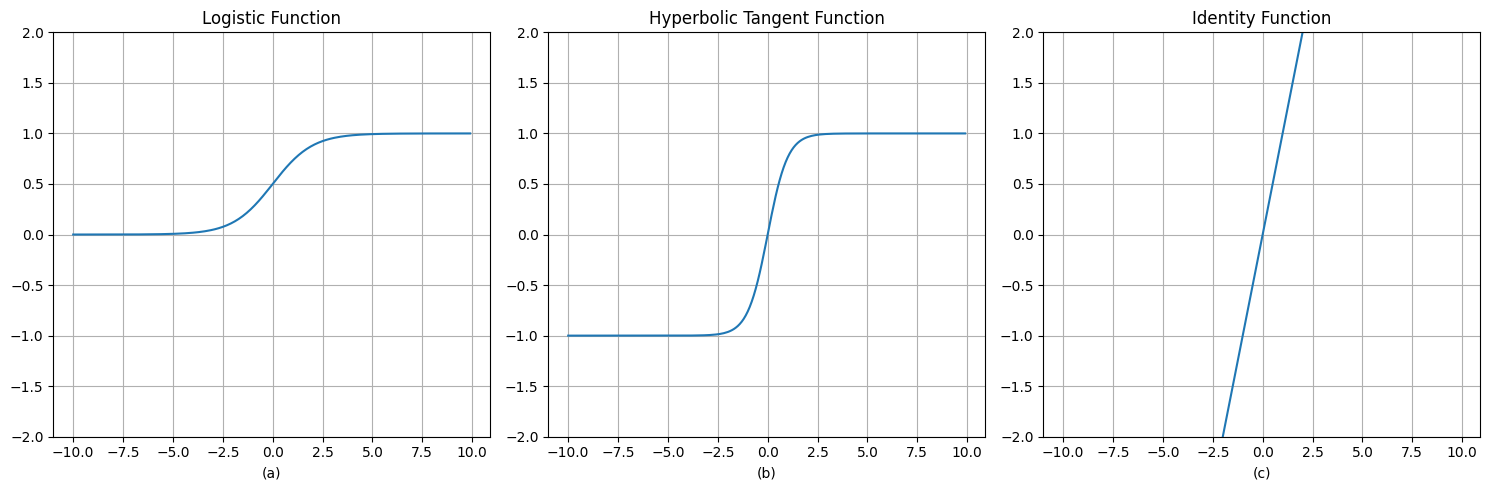

In [ ]:
# Task 1

import numpy as np
import matplotlib.pyplot as plt

# Массив значений x
x = np.arange(-10, 10, 0.1)

# Логистическая функция
y1 = 1 / (1 + np.exp(-x))

# Функция гиперболического тангенса
y2 = np.tanh(x)

# Линейная функция
y3 = x


plt.figure(figsize=(15, 5))

# Логистическая функция
plt.subplot(1, 3, 1)
plt.plot(x, y1)
plt.grid(True)
plt.title('Logistic Function')
plt.xlabel('(a)')
plt.ylim([-2, 2])

# Функция гиперболического тангенса
plt.subplot(1, 3, 2)
plt.plot(x, y2)
plt.grid(True)
plt.title('Hyperbolic Tangent Function')
plt.xlabel('(b)')
plt.ylim([-2, 2])

# Линейная функция
plt.subplot(1, 3, 3)
plt.plot(x, y3)
plt.grid(True)
plt.title('Identity Function')
plt.xlabel('(c)')
plt.ylim([-2, 2])

plt.tight_layout()
plt.show()

In [ ]:
# Task 2

# Входные данные (двухполярные)
x = np.array([[1, 1, -1, -1],  # X1
              [1, -1, 1, -1]]) # X2

# Целевые значения (двухполярные)
t = np.array([1, -1, -1, -1])  # Y


w = np.array([0.0, 0.0])  # Веса
b = 0.0  # Смещение
alpha = 0.1  # Скорость обучения
theta = 0.4  # Пороговое значение

# Функция активации
def activation(yin):
    if yin > theta:
        return 1
    elif yin <= theta and yin >= -theta:
        return 0
    else:
        return -1

# Обучение персептрона
con = 1  # Флаг продолжения обучения
epoch = 0  # Счетчик эпох

while con:
    con = 0
    for i in range(4):
        # Вычисление выхода персептрона
        yin = b + np.dot(w, x[:, i])
        y = activation(yin)
        
        # Обновление весов и смещения, если выход не совпадает с целевым значением
        if y != t[i]:
            con = 1
            for j in range(2):
                w[j] += alpha * t[i] * x[j, i]
            b += alpha * t[i]
    
    epoch += 1


print("Perceptron for AND function")
print("Final Weight matrix:")
print(w)
print("Final Bias:")
print(b)
print("Total epochs:", epoch)

Perceptron for AND function
Final Weight matrix:
[0.5 0.5]
Final Bias:
-0.5
Total epochs: 5


In [8]:
# Task 3

# Входные данные (двухполярные)
x1 = np.array([1, 1, -1, -1])  # X1
x2 = np.array([1, -1, 1, -1])  # X2
x3 = np.array([1, 1, 1, 1])    # Смещение (bias)

# Целевые значения (двухполярные)
t = np.array([1, 1, 1, -1])    # Y


w1, w2, b = 0.1, 0.1, 0.1  # Начальные веса и смещение
alpha = 0.1  # Скорость обучения


e = 2  # Начальное значение ошибки

# Счетчик эпох
epoch = 0

# Обучение
while e > 1.018:
    epoch += 1
    e = 0 

    for i in range(4):
        # Вычисление выхода сети
        nety = w1 * x1[i] + w2 * x2[i] + b

        # Обновление весов и смещения
        delw1 = alpha * (t[i] - nety) * x1[i]
        delw2 = alpha * (t[i] - nety) * x2[i]
        delb = alpha * (t[i] - nety) * x3[i]

        w1 += delw1
        w2 += delw2
        b += delb

        print(f"Epoch {epoch}, Sample {i+1}:")
        print(f"Input: [{x1[i]}, {x2[i]}, {x3[i]}]")
        print(f"Target: {t[i]}, Predicted: {nety:.2f}")
        print(f"Weight Changes: delw1={delw1:.2f}, delw2={delw2:.2f}, delb={delb:.2f}")
        print(f"Updated Weights: w1={w1:.2f}, w2={w2:.2f}, b={b:.2f}")
        print("------------------------")

    # Вычисление общей ошибки для эпохи
    for i in range(4):
        nety = w1 * x1[i] + w2 * x2[i] + b
        e += (t[i] - nety) ** 2

    print(f"Epoch {epoch}, Total Error: {e:.2f}")
    print("================================")

print("Training completed.")
print(f"Final Weights: w1={w1:.2f}, w2={w2:.2f}, b={b:.2f}")
print(f"Total Epochs: {epoch}")

Epoch 1, Sample 1:
Input: [1, 1, 1]
Target: 1, Predicted: 0.30
Weight Changes: delw1=0.07, delw2=0.07, delb=0.07
Updated Weights: w1=0.17, w2=0.17, b=0.17
------------------------
Epoch 1, Sample 2:
Input: [1, -1, 1]
Target: 1, Predicted: 0.17
Weight Changes: delw1=0.08, delw2=-0.08, delb=0.08
Updated Weights: w1=0.25, w2=0.09, b=0.25
------------------------
Epoch 1, Sample 3:
Input: [-1, 1, 1]
Target: 1, Predicted: 0.09
Weight Changes: delw1=-0.09, delw2=0.09, delb=0.09
Updated Weights: w1=0.16, w2=0.18, b=0.34
------------------------
Epoch 1, Sample 4:
Input: [-1, -1, 1]
Target: -1, Predicted: 0.00
Weight Changes: delw1=0.10, delw2=0.10, delb=-0.10
Updated Weights: w1=0.26, w2=0.28, b=0.24
------------------------
Epoch 1, Total Error: 1.68
Epoch 2, Sample 1:
Input: [1, 1, 1]
Target: 1, Predicted: 0.78
Weight Changes: delw1=0.02, delw2=0.02, delb=0.02
Updated Weights: w1=0.28, w2=0.30, b=0.27
------------------------
Epoch 2, Sample 2:
Input: [1, -1, 1]
Target: 1, Predicted: 0.25
W

In [11]:
# Task 4

# Входные данные (двухполярные)
x = np.array([[1, 1, -1, -1],  # X1
              [1, -1, 1, -1]]) # X2

# Целевые значения (двухполярные)
t = np.array([-1, 1, 1, -1])  # Y

w = np.array([[0.05, 0.1],  # Веса для первого слоя
              [0.2, 0.2]])  # Веса для второго слоя
b1 = np.array([0.3, 0.15])   # Смещения для первого слоя
v = np.array([0.5, 0.5])     # Веса для выходного слоя
b2 = 0.5                     # Смещение для выходного слоя

# Скорость обучения
alpha = 0.5

# Флаг продолжения обучения
con = 1

# Счетчик эпох
epoch = 0

# Обучение
while con:
    con = 0
    for i in range(4):
        # Входные сигналы для текущего примера
        x1, x2 = x[:, i]

        # Выходы скрытого слоя
        zin = b1 + np.dot(w.T, [x1, x2])
        z = np.where(zin >= 0, 1, -1)

        # Выход сети
        yin = b2 + np.dot(v, z)
        y = 1 if yin >= 0 else -1

        # Если выход не совпадает с целевым значением
        if y != t[i]:
            con = 1
            if t[i] == 1:
                # Выбор нейрона с минимальным абсолютным значением
                k = np.argmin(np.abs(zin))
                # Обновление весов и смещения для выбранного нейрона
                b1[k] += alpha * (1 - zin[k])
                w[:, k] += alpha * (1 - zin[k]) * np.array([x1, x2])
            else:
                for k in range(2):
                    if zin[k] > 0:
                        # Обновление весов и смещения для всех нейронов
                        b1[k] += alpha * (-1 - zin[k])
                        w[:, k] += alpha * (-1 - zin[k]) * np.array([x1, x2])

    epoch += 1

print("Weight matrix of hidden layer weights:")
print(w)
print("Displacements of the hidden layer:")
print(b1)
print("Total number of training cycles:")
print(epoch)

Weight matrix of hidden layer weights:
[[ 1.3203125 -1.2921875]
 [-1.3390625  1.2859375]]
Displacements of the hidden layer:
[-1.0671875 -1.0765625]
Total number of training cycles:
3


In [12]:
# Task 5

x = np.array([[1, 1, -1, -1],  # X1
              [1, -1, 1, -1]]) # X2

t = np.array([1, 1, 1, -1])  # Y

w = np.array([0.0, 0.0])  # Веса
b = 0.0  # Смещение
alpha = 0.1  # Скорость обучения
theta = 0.4  # Пороговое значение

# Функция активации
def activation(yin):
    if yin > theta:
        return 1
    elif yin <= theta and yin >= -theta:
        return 0
    else:
        return -1

# Обучение
con = 1
epoch = 0

while con:
    con = 0
    for i in range(4):
        # Вычисление выхода персептрона
        yin = b + np.dot(w, x[:, i])
        y = activation(yin)
        
        # Обновление весов и смещения, если выход не совпадает с целевым значением
        if y != t[i]:
            con = 1
            for j in range(2):
                w[j] += alpha * t[i] * x[j, i]
            b += alpha * t[i]
    
    epoch += 1

print("Perseptron for the AND-NOT function")
print("Final weights:")
print(w)
print("Final shift:")
print(b)
print("Total number of learning epochs:")
print(epoch)

Perseptron for the AND-NOT function
Final weights:
[0.5 0.5]
Final shift:
0.5
Total number of learning epochs:
5
